#Telecom company needs to predict which customers are at high risk of churn so that company will take necessary steps to retain high profitable customers
###Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
###In this case study, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

We will use CRISP-DM methodology to solve this problem. 



In [7]:
#lets import all required libraries to build this predictve model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#lets load the dataset from the google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1-uyYcOUZDZEfKDIecRudNkYRK7hfKWuz8E'}) 

In the given dataset, has huge cols(more than 200 cols) and rows, it's not possible to see all cols with the default display size of pandas.so lets first increase display size

In [0]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#Lets read dataset and store in dataframe
downloaded.GetContentFile('telecom_churn_data.csv')  
df = pd.read_csv('telecom_churn_data.csv')

In [11]:
#lets have quick look on first five rows and all cols
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [12]:
#Lets see no. of non-zero rows and data type of all the cols
df.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

# As telecom company needs to predict churn only for the high-value customers so lets filter the all high-value customers(rows)
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:

df['avg_rech_amt_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2
df = df[df['avg_rech_amt_6_7'] > df.avg_rech_amt_6_7.quantile(0.7)]
df.shape


(29979, 227)

In [14]:
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

In [0]:
#As we don't have of the given dataset so lets create label column based on give below steps, for churn=1 or non-charn=0

##Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [16]:
df['churn']=df['total_ic_mou_9']+ df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']
df['churn'].head(10)

7        0.00
8      177.09
13    1077.95
16     590.30
17     718.21
21    1284.14
24     957.81
33    5734.89
38     822.13
41     254.97
Name: churn, dtype: float64

In [0]:
df['churn'] = df['churn'] == 0.0
df['churn']= df['churn'].map({True: 1, False: 0})
df.churn.head(10)
churn_col=df['churn']

In [0]:
#Lets delete the attributes of the churn phase and avg_rech_amt_6_7

churn_att=['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','avg_rech_amt_6_7']
tele_df=df.drop(churn_att,axis=1)

In [19]:
tele_df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
7      7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29          NaN        453.43        567.16        325.91           NaN          16.23          33.49          31.64            NaN          23.74          12.59          38.06            NaN             51.39             31.38             40.28               NaN            308.63            447.38            162.28               NaN             62.13             55.14             53.23               NaN              0.00               0.0              0.00               NaN        422.16        533.91        255.79           NaN              4.30             23.29             12.01               NaN             49.89             31.76             49.14               NaN              6.66             20.08             16.68               NaN   
8      7001524846        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   378.721   492.223   137.362  166.787       413.69       351.03        35.08        33.46         94.66         80.63        136.48        108.71           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             26.13             80.96             70.58             50.54             34.58              0.00              0.00              0.00              0.00              0.00               0.0              7.15              0.00        378.09        288.18         63.04         60.71            116.56            133.43             22.58              7.33             13.69             10.04             75.69             74.13              0.00              0.00              0.00              0.00   
13     7002191713        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   492.846   205.671   593.260  322.732       501.76       108.39       534.24       244.81        413.31        119.28        482.46        214.06          23.53         144.24          72.11         136.78           7.98          35.26           1.44          12.78             49.63              6.19             36.01              6.14            151.13             47.28            294.46            108.24              4.54              0.00             23.51              5.29              0.00               0.0              0.49              0.00        205.31         53.48        353.99        119.69            446.41             85.98            498.23            230.38            255.36             52.94            156.94             96.01              0.00              0.00              0.00              0.00   
16     7000875565        109            

In [20]:
round(100*(tele_df.isnull().sum()/len(tele_df.index)), 5)

mobile_number                0.00000
circle_id                    0.00000
loc_og_t2o_mou               0.38027
std_og_t2o_mou               0.38027
loc_ic_t2o_mou               0.38027
last_date_of_month_6         0.00000
last_date_of_month_7         0.10341
last_date_of_month_8         0.52370
last_date_of_month_9         1.20084
arpu_6                       0.00000
arpu_7                       0.00000
arpu_8                       0.00000
arpu_9                       0.00000
onnet_mou_6                  1.05407
onnet_mou_7                  1.01071
onnet_mou_8                  3.12886
onnet_mou_9                  5.68064
offnet_mou_6                 1.05407
offnet_mou_7                 1.01071
offnet_mou_8                 3.12886
offnet_mou_9                 5.68064
roam_ic_mou_6                1.05407
roam_ic_mou_7                1.01071
roam_ic_mou_8                3.12886
roam_ic_mou_9                5.68064
roam_og_mou_6                1.05407
roam_og_mou_7                1.01071
r

As par problem statment, After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
So lets delete those cols from dataset

In [0]:
#Lets filter the cols, whose ends with _9 and store in list
cols=[]
for col in tele_df.columns:
  if('_9' in col):
    cols.append(col)

In [22]:
cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [23]:
#Lets delete the above cols
tele_data=tele_df.drop(cols,axis=1)
tele_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7      7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68               0.0               0.0               0.0         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53   
8      7001524846        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00               0.0               0.0               0.0        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36   
13     7002191713        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51               0.0               0.0              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00               0.0               0.0               0.0        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09   
16     7

In [24]:
#lets see no. of null value in % of each column
round(100*(tele_data.isnull().sum()/len(tele_data.index)), 5)

mobile_number                0.00000
circle_id                    0.00000
loc_og_t2o_mou               0.38027
std_og_t2o_mou               0.38027
loc_ic_t2o_mou               0.38027
last_date_of_month_6         0.00000
last_date_of_month_7         0.10341
last_date_of_month_8         0.52370
arpu_6                       0.00000
arpu_7                       0.00000
arpu_8                       0.00000
onnet_mou_6                  1.05407
onnet_mou_7                  1.01071
onnet_mou_8                  3.12886
offnet_mou_6                 1.05407
offnet_mou_7                 1.01071
offnet_mou_8                 3.12886
roam_ic_mou_6                1.05407
roam_ic_mou_7                1.01071
roam_ic_mou_8                3.12886
roam_og_mou_6                1.05407
roam_og_mou_7                1.01071
roam_og_mou_8                3.12886
loc_og_t2t_mou_6             1.05407
loc_og_t2t_mou_7             1.01071
loc_og_t2t_mou_8             3.12886
loc_og_t2m_mou_6             1.05407
l

In [25]:
#Now lets Start Data clening  
#As we can see above has so many cols whose null value greater than 60%
#Lets filter cols whose null value grater than 60%
cols_grater_than_60_null=tele_data.columns[(100*tele_data.isnull().sum()/len(tele_data.index))>60.0]
cols_grater_than_60_null


Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], dtype='object')

In [26]:
tele_data[cols_grater_than_60_null].head(10)

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8
7                       NaN                      NaN                      NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN        NaN        NaN        NaN        NaN        NaN        NaN               NaN               NaN               NaN        NaN        NaN        NaN
8                       NaN                7/31/2014                8/23/2014                NaN                2.0                3.0              NaN            154.0             23.0              NaN              2.0              3.0              NaN              0.0              0.0                 NaN               177.0                69.0        NaN       0.00      19.83        NaN        0.0       0.00               NaN               0.0               0.0        NaN        1.0        1.0
13                      NaN                      NaN                8/30/2014                NaN                NaN                3.0              NaN              NaN             23.0              NaN              NaN              3.0              NaN              NaN              0.0                 NaN                 NaN                69.0        NaN        NaN       0.00        NaN        NaN       0.20               NaN               NaN               0.0        NaN        NaN        1.0
16                      NaN                      NaN                      NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN        NaN        NaN        NaN        NaN        NaN        NaN               NaN               NaN               NaN        NaN        NaN        NaN
17                      NaN                      NaN                      NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN        NaN        NaN        NaN        NaN        NaN        NaN               NaN               NaN               NaN        NaN        NaN        NaN
21                      NaN                      NaN                      NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN        NaN        NaN        NaN        NaN        NaN        NaN               NaN               NaN               NaN        NaN        NaN        NaN
24                      NaN                      NaN                      NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN        NaN        NaN        NaN        NaN        NaN        NaN               NaN               NaN               NaN        NaN        NaN       

In [27]:
#lets check variance in the data of above cols 
tele_data[cols_grater_than_60_null].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_2g_6     arpu_2g_7     arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8     fb_user_6     fb_user_7     fb_user_8
count       11387.000000       11652.000000       11741.000000     11387.000000     11652.000000     11741.000000     11387.000000     11652.000000     11741.000000     11387.000000     11652.000000     11741.000000        11387.000000        11652.000000        11741.000000  11387.000000  11652.000000  11741.000000  11387.000000  11652.000000  11741.000000      11387.000000      11652.000000      11741.000000  11387.000000  11652.000000  11741.000000
mean            2.466585           2.711637           2.643812       149.932730       151.070031       141.141044         1.644858         1.848095         1.842518         0.821727         0.863543         0.801295          239.023372          251.124768          229.299666    142.282066    143.912268    133.184420    132.375393    133.507640    122.219423          0.027312          0.025403          0.023763      0.897603      0.889804      0.837322
std             2.950020           3.238113           3.244527       124.726818       127.107612       126.224685         2.491718         2.739343         2.621914         1.604493         1.762361         1.748677          246.759326          250.519996          237.158003    255.381942    259.576282    240.431484    225.690628    230.872204    212.707411          0.162998          0.157354          0.152316      0.303184      0.313147      0.369087
min             1.000000           1.000000           1.000000         1.000000         1.000000         1.000000         0.000000         0.000000         0.000000         0.000000         0.000000         0.000000            1.000000            1.000000            1.000000    -30.280000    -26.040000    -20.040000    -15.320000    -15.480000    -24.430000          0.000000          0.000000          0.000000      0.000000      0.000000      0.000000
25%             1.000000           1.000000           1.000000        41.000000        33.000000        25.000000         0.000000         0.000000         0.000000         0.000000         0.000000         0.000000           98.000000          115.000000           92.000000      0.000000      0.000000      0.000000      0.010000      0.000000      0.000000          0.000000          0.000000          0.000000      1.000000      1.000000      1.000000
50%             1.000000           2.000000           2.000000       154.000000       154.000000       154.000000         1.000000         1.000000         1.000000         0.000000         0.000000         0.000000          177.000000          185.000000          164.000000     22.510000     21.910000     11.440000     40.340000     35.000000     21.520000          0.000000          0.000000          0.000000      1.000000      1.000000      1.000000
75%             3.000000           3.000000           3.000000       198.000000       198.000000       198.000000         2.000000         2.000000         2.000000         1.000000         1.000000         1.000000          297.000000          304.000000          271.000000    212.170000    212.170000    212.170000    212.170000    212.170000    212.170000          0.000000          0.000000          0.000000      1.000000      1.000000      1.000000
max            61.000000          54.000000          60.000000      1555.000000      1555.000000      1555.000000        39.000000        48.000000        44.000000        29.000000        35.000000        45.000000         7546.000000         4365.000000         4061.000000   6362.280000   4980.900000   3716.900000   6433.760000   4809.360000   3467.170000

In [0]:
#lets first drop cols having more than 60% null values

telecom_df=tele_data.drop(cols_grater_than_60_null,axis=1)                                                                                                                                             

In [29]:
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7      7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68               0.0               0.0               0.0         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53   
8      7001524846        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00               0.0               0.0               0.0        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36   
13     7002191713        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51               0.0               0.0              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00               0.0               0.0               0.0        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09   
16     7

In [30]:
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 5)

mobile_number           0.00000
circle_id               0.00000
loc_og_t2o_mou          0.38027
std_og_t2o_mou          0.38027
loc_ic_t2o_mou          0.38027
last_date_of_month_6    0.00000
last_date_of_month_7    0.10341
last_date_of_month_8    0.52370
arpu_6                  0.00000
arpu_7                  0.00000
arpu_8                  0.00000
onnet_mou_6             1.05407
onnet_mou_7             1.01071
onnet_mou_8             3.12886
offnet_mou_6            1.05407
offnet_mou_7            1.01071
offnet_mou_8            3.12886
roam_ic_mou_6           1.05407
roam_ic_mou_7           1.01071
roam_ic_mou_8           3.12886
roam_og_mou_6           1.05407
roam_og_mou_7           1.01071
roam_og_mou_8           3.12886
loc_og_t2t_mou_6        1.05407
loc_og_t2t_mou_7        1.01071
loc_og_t2t_mou_8        3.12886
loc_og_t2m_mou_6        1.05407
loc_og_t2m_mou_7        1.01071
loc_og_t2m_mou_8        3.12886
loc_og_t2f_mou_6        1.05407
loc_og_t2f_mou_7        1.01071
loc_og_t

In [31]:

telecom_df.shape

(29979, 143)

In [32]:
#Let us see data distribution in telecom_df
telecom_df.describe(percentiles=[0.80,0.90,0.95,0.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
count   2.997900e+04    29979.0         29865.0         29865.0         29865.0  29979.000000  29979.000000  29979.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000   29663.000000   29676.000000   29041.000000    29663.00000   29676.000000   29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000  29663.000000  29676.000000  29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000       29676.00000      29041.000000           29663.0           29676.0           29041.0  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000    29979.000000    29979.000000    29979.000000   
mean    7.001223e+09      109.0             0.0             0.0             0.0    587.587624    589.424681    535.067748    299.392147    307.701888    276.459159    422.582059    428.433657    387.277278      17.613734      13.673468      13.691460       29.66101      22.281627      22.177442         95.742759         96.765436         90.000551        183.268532        183.174937        173.030627          7.053548          7.172642          6.705906          1.584424          1.882820          1.769414    286.073738    287.122076    269.745785        191.914956        202.103541        177.922163        205.376377        215.696797        185.468308          2.033503           2.05668          1.848781               0.0               0.0               0.0    399.329215    419.861391    365.243279      2.290991      2.230369      2.095232      5.983799      7.505682      7.111893      0.700584      0.048137      0.061106      687.068925      709.531995      624.107691   
std     6.846594e+05        0.0             0.0             0.0             0.0    442.848876    463.049067    492.447887    462.369385    483.432401    471.700220    471.281393    487.288606    480.450594      79.593002      76.719673      75.744432      119.22124      98.448242     107.926673        238.016910        249.324601        238.064175        250.855944        241.340643        236.689325         22.780541         22.702787         20.518192          6.927055          9.305441          7.513241    381.029238    376.804351    369.470137        411.577801        430.004870        415.595486        415.323157        439.802803        422.331860         12.528190          13.42370         11.889492               0.0               0.0               0.0    608.562481    639.529047    622.988427     46.186003     45.874448     45.534328     18.719302     23.181829     23.236275      2.293435      2.757213      3.375300      660.557039      685.283264      686.211375   
min     7.000000e+09      109.0             0.0    

In [33]:
telecom_df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 143 columns):
mobile_number           29979 non-null int64
circle_id               29979 non-null int64
loc_og_t2o_mou          29865 non-null float64
std_og_t2o_mou          29865 non-null float64
loc_ic_t2o_mou          29865 non-null float64
last_date_of_month_6    29979 non-null object
last_date_of_month_7    29948 non-null object
last_date_of_month_8    29822 non-null object
arpu_6                  29979 non-null float64
arpu_7                  29979 non-null float64
arpu_8                  29979 non-null float64
onnet_mou_6             29663 non-null float64
onnet_mou_7             29676 non-null float64
onnet_mou_8             29041 non-null float64
offnet_mou_6            29663 non-null float64
offnet_mou_7            29676 non-null float64
offnet_mou_8            29041 non-null float64
roam_ic_mou_6           29663 non-null float64
roam_ic_mou_7           29676 non-null float64
roam

In [0]:
#lets drop cols which have zero variance
#these cols 'last_date_of_month_6', 'last_date_of_month_7',	'last_date_of_month_8' hold single value
#cols=telecom_df.columns[telecom_df.var()!=0.0]

telecom_df_1=telecom_df.drop(['last_date_of_month_6', 'last_date_of_month_7',	'last_date_of_month_8'],axis=1)

In [35]:
#lets extract day from 'date_of_last_rech_6',	'date_of_last_rech_7',	'date_of_last_rech_8' and store in three cols seperatety
telecom_df_1['day_of_last_rech_6']=pd.to_datetime(telecom_df_1['date_of_last_rech_6']).dt.day
telecom_df_1['day_of_last_rech_7']=pd.to_datetime(telecom_df_1['date_of_last_rech_7']).dt.day
telecom_df_1['day_of_last_rech_8']=pd.to_datetime(telecom_df_1['date_of_last_rech_8']).dt.day
telecom_df_1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
7      7000701601        109             0.0             0.0             0.0  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68               0.0               0.0               0.0         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53          609.24          350.16             58.14   
8      7001524846        109             0.0             0.0             0.0   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00               0.0               0.0               0.0        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36          431.66          171.56             23.84   
13     7002191713        109             0.0             0.0             0.0   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51               0.0               0.0              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00               0.0               0.0               0.0        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09          192.41         1015.26             67.88   
16     7000875565        109             0.0             0.0

In [0]:
#Lets drop 'date_of_last_rech_6',	'date_of_last_rech_7',	'date_of_last_rech_8'
telecom_df_2=telecom_df_1.drop(['date_of_last_rech_6',	'date_of_last_rech_7',	'date_of_last_rech_8'],axis=1)

In [37]:
telecom_df_2.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 140 columns):
mobile_number         29979 non-null int64
circle_id             29979 non-null int64
loc_og_t2o_mou        29865 non-null float64
std_og_t2o_mou        29865 non-null float64
loc_ic_t2o_mou        29865 non-null float64
arpu_6                29979 non-null float64
arpu_7                29979 non-null float64
arpu_8                29979 non-null float64
onnet_mou_6           29663 non-null float64
onnet_mou_7           29676 non-null float64
onnet_mou_8           29041 non-null float64
offnet_mou_6          29663 non-null float64
offnet_mou_7          29676 non-null float64
offnet_mou_8          29041 non-null float64
roam_ic_mou_6         29663 non-null float64
roam_ic_mou_7         29676 non-null float64
roam_ic_mou_8         29041 non-null float64
roam_og_mou_6         29663 non-null float64
roam_og_mou_7         29676 non-null float64
roam_og_mou_8         29041 non-null fl

In [0]:
#As we can see some of cols have only single value (0.0) it means it has zero variance
#lets filter those cols from the dataset
cols_with_zero_variance=telecom_df_2.columns[telecom_df_2.var()==0.0]

In [40]:
cols_with_zero_variance

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

In [0]:
#lets drop the above cols
telecom_df_3=telecom_df_2.drop(cols_with_zero_variance,axis=1)

In [42]:
telecom_df_3.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53          609.24          350.16             58.14             32.26             27.31            217.56            221.49            121.19            152.16            101.46   
8      7001524846   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36          431.66          171.56             23.84              9.84              0.31             57.58             13.98             15.48              0.00              0.00   
13     7002191713   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51               0.0               0.0              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09          192.41         1015.26             67.88              7.58             52.58            142.88             18.53            195.18              4.81              0.00   
16     7

In [43]:
#droping mobile_number as it has unique value which represent mob no. of each and every customers
telecom_df_4=telecom_df_3.drop("mobile_number",axis=1)
telecom_df_4.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23               0.0               0.0              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53          609.24          350.16             58.14             32.26             27.31            217.56            221.49            121.19            152.16            101.46   
8    378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00               0.0               0.0              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36          431.66          171.56             23.84              9.84              0.31             57.58             13.98             15.48              0.00              0.00   
13   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51               0.0               0.0              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09          192.41         1015.26             67.88              7.58             52.58            142.88             18.53            195.18              4.81              0.00   
16   430.975   299.869   187.894        50.51        74.01        70.6

In [44]:
telecom_df_4.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 129 columns):
arpu_6                29979 non-null float64
arpu_7                29979 non-null float64
arpu_8                29979 non-null float64
onnet_mou_6           29663 non-null float64
onnet_mou_7           29676 non-null float64
onnet_mou_8           29041 non-null float64
offnet_mou_6          29663 non-null float64
offnet_mou_7          29676 non-null float64
offnet_mou_8          29041 non-null float64
roam_ic_mou_6         29663 non-null float64
roam_ic_mou_7         29676 non-null float64
roam_ic_mou_8         29041 non-null float64
roam_og_mou_6         29663 non-null float64
roam_og_mou_7         29676 non-null float64
roam_og_mou_8         29041 non-null float64
loc_og_t2t_mou_6      29663 non-null float64
loc_og_t2t_mou_7      29676 non-null float64
loc_og_t2t_mou_8      29041 non-null float64
loc_og_t2m_mou_6      29663 non-null float64
loc_og_t2m_mou_7      29676 non-nul

In [45]:
#lets check null in telecom_df_4 
round(100*(telecom_df_4.isnull().sum()/len(telecom_df_4.index)), 5)

arpu_6                0.00000
arpu_7                0.00000
arpu_8                0.00000
onnet_mou_6           1.05407
onnet_mou_7           1.01071
onnet_mou_8           3.12886
offnet_mou_6          1.05407
offnet_mou_7          1.01071
offnet_mou_8          3.12886
roam_ic_mou_6         1.05407
roam_ic_mou_7         1.01071
roam_ic_mou_8         3.12886
roam_og_mou_6         1.05407
roam_og_mou_7         1.01071
roam_og_mou_8         3.12886
loc_og_t2t_mou_6      1.05407
loc_og_t2t_mou_7      1.01071
loc_og_t2t_mou_8      3.12886
loc_og_t2m_mou_6      1.05407
loc_og_t2m_mou_7      1.01071
loc_og_t2m_mou_8      3.12886
loc_og_t2f_mou_6      1.05407
loc_og_t2f_mou_7      1.01071
loc_og_t2f_mou_8      3.12886
loc_og_t2c_mou_6      1.05407
loc_og_t2c_mou_7      1.01071
loc_og_t2c_mou_8      3.12886
loc_og_mou_6          1.05407
loc_og_mou_7          1.01071
loc_og_mou_8          3.12886
std_og_t2t_mou_6      1.05407
std_og_t2t_mou_7      1.01071
std_og_t2t_mou_8      3.12886
std_og_t2m

In [0]:

#Select cols which having null
col_with_null=[]
for col in telecom_df_4.columns:
  if((telecom_df_4[col].isnull().sum()/len(telecom_df_4.index))>0.0):
    col_with_null.append(col)

In [47]:
col_with_null

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [48]:
#lets hundle each and every column who has null values
#First describe the above filtered list and let us see variance in data 
telecom_with_null_col=telecom_df_4[col_with_null]
telecom_with_null_col.describe(percentiles=[0.80,0.90,0.95,0.99])

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
count  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000   29663.000000   29676.000000   29041.000000    29663.00000   29676.000000   29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000  29663.000000  29676.000000  29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000       29676.00000      29041.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000  29663.000000  29676.000000  29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000      29663.000000      29676.000000      29041.000000  29663.000000  29676.000000  29041.000000      29663.000000   
mean     299.392147    307.701888    276.459159    422.582059    428.433657    387.277278      17.613734      13.673468      13.691460       29.66101      22.281627      22.177442         95.742759         96.765436         90.000551        183.268532        183.174937        173.030627          7.053548          7.172642          6.705906          1.584424          1.882820          1.769414    286.073738    287.122076    269.745785        191.914956        202.103541        177.922163        205.376377        215.696797        185.468308          2.033503           2.05668          1.848781    399.329215    419.861391    365.243279      2.290991      2.230369      2.095232      5.983799      7.505682      7.111893      0.700584      0.048137      0.061106         69.504337         71.047016         68.089452        161.379733        162.498289        158.612226         15.770853         16.687581         15.188150    246.664876    250.242986    241.899720         16.411298   
std      462.369385    483.432401    471.700220    471.281393    487.288606    480.450594      79.593002      76.719673      75.744432      119.22124      98.448242     107.926673        238.016910        249.324601        238.064175        250.855944        241.340643        236.689325         22.780541         22.702787         20.518192          6.927055          9.305441          7.513241    381.029238    376.804351    369.470137        411.577801        430.004870        415.595486        415.323157        439.802803        422.331860         12.528190          13.42370         11.889492    608.562481    639.529047    622.988427     46.186003     45.874448     45.534328     18.719302     23.181829     23.236275      2.293435      2.757213      3.375300        159.386596        168.071992        157.806028        222.657561        220.025170        218.744959         46.062813         49.724639         44.349285    313.572850    316.188509    309.094389         79.300976   
min        0.000000      0.000000   

In [0]:
#While seeing the stastical data in the above cols, almost all cols have outlier
#Here we have two approach one is delete those rows and second is impute, So lets first go with imputing approach 
# So beter to impute with medium in the palce of nan.

In [0]:

from sklearn.impute import SimpleImputer
def replace_missing_value(df, number_features):
  imputer = SimpleImputer(strategy="median")
  df_num = df[number_features]
  imputer.fit(df_num)
  X = imputer.transform(df_num)
  res_def = pd.DataFrame(X, columns=df_num.columns)
  return res_def


In [52]:
telecom_df_5=replace_missing_value(telecom_df_4,telecom_df_4.columns)
print(telecom_df_5.shape)



(29979, 129)


In [53]:
telecom_df_5.info(max_cols=200)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Data columns (total 129 columns):
arpu_6                29979 non-null float64
arpu_7                29979 non-null float64
arpu_8                29979 non-null float64
onnet_mou_6           29979 non-null float64
onnet_mou_7           29979 non-null float64
onnet_mou_8           29979 non-null float64
offnet_mou_6          29979 non-null float64
offnet_mou_7          29979 non-null float64
offnet_mou_8          29979 non-null float64
roam_ic_mou_6         29979 non-null float64
roam_ic_mou_7         29979 non-null float64
roam_ic_mou_8         29979 non-null float64
roam_og_mou_6         29979 non-null float64
roam_og_mou_7         29979 non-null float64
roam_og_mou_8         29979 non-null float64
loc_og_t2t_mou_6      29979 non-null float64
loc_og_t2t_mou_7      29979 non-null float64
loc_og_t2t_mou_8      29979 non-null float64
loc_og_t2m_mou_6      29979 non-null float64
loc_og_t2m_mou_7      29979 non-nul

In [54]:
round(100*(telecom_df_5.isnull().sum()/len(telecom_df_5.index)), 5)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [0]:
#We have done with data cleaning part

In [56]:
# looks like we have quite a bit of out liers, lets treat them using z-score
from scipy import stats
z_score = np.abs(stats.zscore(telecom_df_5))
z_score

array([[1.08750509, 1.64224065, 5.35377711, ..., 0.04187371, 0.57700427,
        0.18869271],
       [0.47165098, 0.20992009, 0.80762329, ..., 0.4292586 , 0.79883837,
        0.60402293],
       [0.21394026, 0.82876764, 0.11817133, ..., 1.6070894 , 1.26492559,
        0.60402293],
       ...,
       [0.12958446, 0.28981576, 0.05943114, ..., 1.6070894 , 0.11091705,
        1.774124  ],
       [0.62105659, 0.16519622, 0.27005896, ..., 0.74857219, 0.11091705,
        0.40584402],
       [0.59749737, 0.61773897, 0.14570161, ..., 2.31378787, 1.95284691,
        1.37776618]])

In [57]:
# lets define threhold a 3 Standard Deviation distance to the mean
threshold = 3
print(np.where(z_score > 3))

(array([    0,     0,     0, ..., 29977, 29978, 29978]), array([  2,  95,  96, ...,  75, 116, 121]))


In [0]:
telecom_df_6= telecom_df_5[(z_score <3).all(axis=1)]

In [59]:
telecom_df_6.shape

(12214, 129)

In [60]:
telecom_df_6[telecom_df_6.churn == 1]

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, last_day_rch_amt_6, ...]
Index: []

In [0]:
# if we remove the outliers, we are just left with relatively small data set with only 11.5k records.
# And surprisingly we don't have a single record with churn
# so lets cap the outliers to 3-sigma values
def cap_outliers(input_list, k = 3):
    upper_limit = input_list.mean() + k * input_list.std()
    lower_limit = input_list.mean() - k * input_list.std()
    input_list[input_list<lower_limit] = lower_limit
    input_list[input_list>upper_limit] = upper_limit
    return input_list

In [0]:
# all_columns = telecom_df_5.select_dtypes(include ='float64').columns
# all_columns
# telecom_df_5[all_columns] = telecom_df_5[all_columns].apply(cap_outliers, axis=0)
# telecom_df_5.describe(include='all')


#Lets go with dataset with outliers and build the various models

In [63]:
telecom_df_5.shape

(29979, 129)

In [0]:
#We have done with data clean up.

# Before we start model building process, Lets first see correlation betwee features
# Let us visualise data and see association with numeric variables
#Ploting pairwise scatter plots, for that we need matplotlib and seaborn lib.
#plt.figure(figsize=(50,20))
#sns.pairplot(telecom_df_5)
#plt.show()


In [65]:

#As we can vizualise the above pairwise plot and have basic understanding about correlation between variables.
#We can see clearly there is storng correlation exist between features. 

(29979, 129)

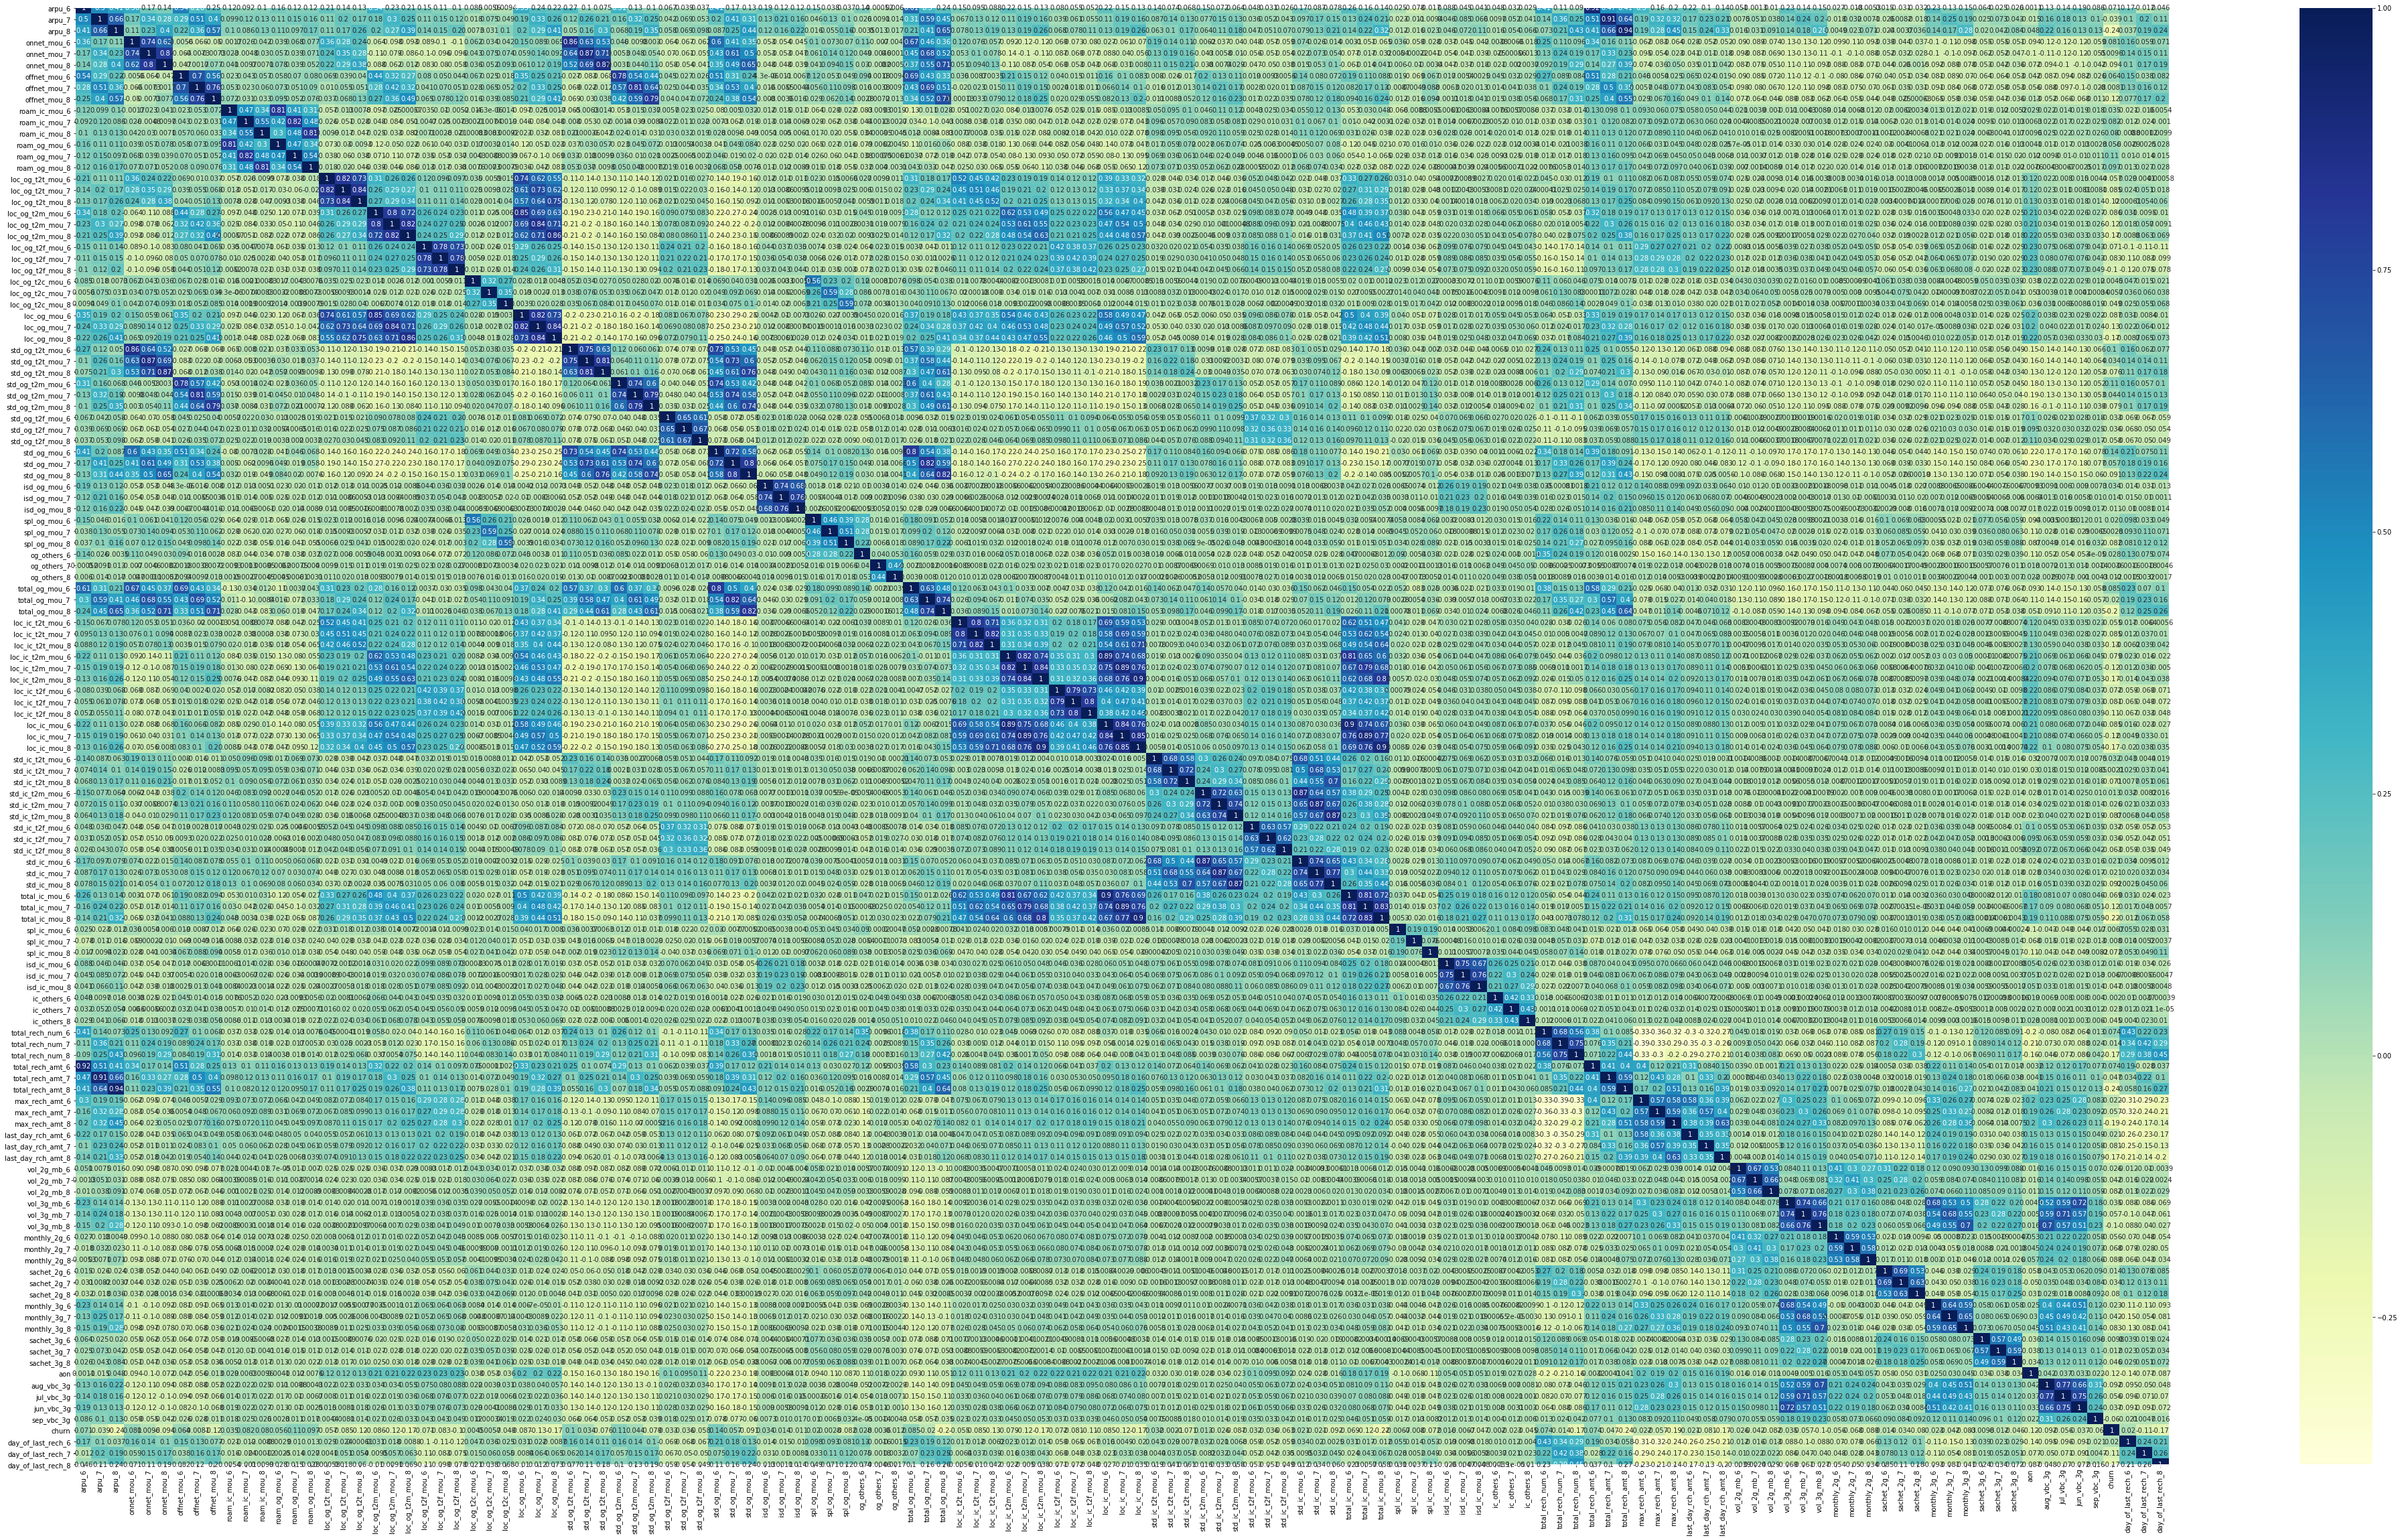

In [66]:

# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (70, 40))
sns.heatmap(telecom_df_5.corr(), annot = True, cmap="YlGnBu")
plt.show()


There are pairs are highly correlated (total_rech_amt_6, arpu_6), (total_rech_amt_7, arpu_7),(total_rech_amt_8, arpu_8),(jun_vbc_3g,vol_3g_mb_6),(jul_vbc_3g,vol_3g_mb_7),(aug_vbc_3g,vol_3g_mb_8),(monthly_3g_6,vol_3g_mb_6),(monthly_3g_7,vol_3g_mb_7),(monthly_3g_8,vol_3g_mb_8)

In [64]:
#lets drop the highly correlated features
telecom_df_6=telecom_df_5.drop(['arpu_6','arpu_7','arpu_8','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','monthly_3g_6','monthly_3g_7','monthly_3g_8'],axis=1)
telecom_df_6.shape

(29979, 120)

In [65]:
telecom_df_6.churn

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29974    0.0
29975    0.0
29976    0.0
29977    0.0
29978    0.0
Name: churn, Length: 29979, dtype: float64

In [66]:
#Let's now look at the distribution of the target variable 'churn'.
100*(telecom_df_6['churn'].astype('object').value_counts()/len(telecom_df_6.index))

0.0    91.363955
1.0     8.636045
Name: churn, dtype: float64

In [0]:
#As we can clearly see that we have imbalance class so we will take care this while model building


#Lets do data preparation for model building
# create x and y train
X = telecom_df_6.drop('churn', axis=1)
y =telecom_df_6['churn']

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [73]:
#Let us make all the data points on the same scale for that lets use StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
print(X_train.shape)
print(X_test.shape)

(20985, 119)
(8994, 119)


In [0]:
# lets create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [75]:
#lets create PCA object and fit on the dataset 
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [76]:

pca.components_

array([[-1.78822726e-02, -2.27055982e-02, -1.10430220e-02, ...,
        -1.95448617e-02, -7.23144113e-03, -1.35776059e-02],
       [ 1.73463613e-01,  1.99021311e-01,  1.95378830e-01, ...,
         8.01847589e-02,  8.01922022e-02,  7.85860518e-02],
       [-1.04201195e-01, -1.05944297e-01, -9.79750887e-02, ...,
        -6.14127618e-02, -5.20401220e-02, -4.20129713e-02],
       ...,
       [-4.08026631e-06,  7.80281460e-06, -4.18697161e-06, ...,
         3.59609920e-07,  1.39435494e-07,  3.33870714e-07],
       [-2.08721154e-06,  8.22244983e-07, -1.86724529e-06, ...,
         1.12780293e-07, -1.78555122e-07, -9.02458951e-08],
       [-2.24520736e-06,  2.37256185e-06, -1.82373697e-06, ...,
         7.88670095e-08, -7.13036835e-08, -1.31088245e-07]])

In [77]:
pd.Series(np.round( pca.explained_variance_ratio_.cumsum(), 4) * 100)

0        9.73
1       18.27
2       23.32
3       28.02
4       31.91
5       35.59
6       38.52
7       41.35
8       44.03
9       46.54
10      48.89
11      51.22
12      53.48
13      55.69
14      57.86
15      59.87
16      61.59
17      63.19
18      64.71
19      66.16
20      67.48
21      68.75
22      70.01
23      71.11
24      72.13
25      73.15
26      74.12
27      75.06
28      75.94
29      76.77
30      77.60
31      78.41
32      79.21
33      79.99
34      80.74
35      81.48
36      82.17
37      82.86
38      83.53
39      84.19
40      84.84
41      85.45
42      86.05
43      86.64
44      87.21
45      87.74
46      88.25
47      88.73
48      89.20
49      89.63
50      90.05
51      90.47
52      90.87
53      91.25
54      91.63
55      92.00
56      92.36
57      92.69
58      93.02
59      93.34
60      93.64
61      93.93
62      94.22
63      94.51
64      94.79
65      95.06
66      95.34
67      95.60
68      95.85
69      96.09
70      96.32
71    

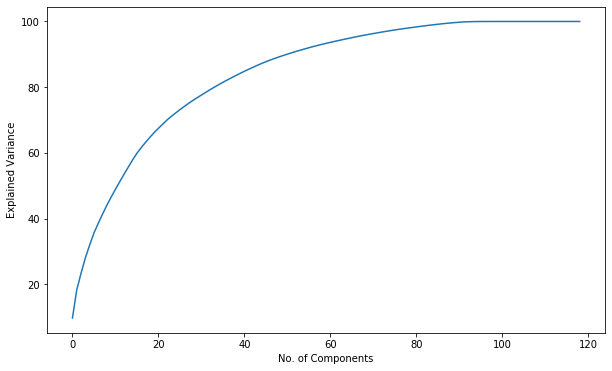

In [78]:
# Lets see the scree plot of PC's vs Variance
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(pca.explained_variance_ratio_.cumsum() *100)
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.show()

In [0]:
#As we can see above graph
# 65 principle components explaining 95.06 variance
#So lets start with n_pcs=65
#Lets build Logistic regression with 

PCS_COUNT = 67
steps = [ ("pca", PCA(n_components=PCS_COUNT,svd_solver='randomized', random_state=42)),
         ("logisticregresion", LogisticRegression(class_weight={0:.08, 1: .92}))
        ]
pipe_SC_PCA_LR = Pipeline(steps)


In [80]:
pipe_SC_PCA_LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=67,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('logisticregresion',
                 LogisticRegression(C=1.0, class_weight={0: 0.08, 1: 0.92},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [81]:
#lets predict
from sklearn import metrics
# Print the prediction accuracy
y_test_pred = pipe_SC_PCA_LR.predict(X_test)
# Print the prediction accuracy
accuracy_LR=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_LR: ",accuracy_LR)
sensitivity_LR, specificity_LR, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_LR: ', round(sensitivity_LR,2))
print('specificity_LR: ', round(specificity_LR,2))

# Area under curve
y_test_pred_proba = pipe_SC_PCA_LR.predict_proba(X_test)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2)) 

accuracy_LR:  0.8115410273515677
sensitivity_LR:  0.83
specificity_LR:  0.81
AUC:  0.88


In [82]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[6624, 1555],
       [ 140,  675]])

In [83]:
#Lets Build Decision Tree model

from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Seed for reproducability
seed = 1234
np.random.seed(seed)

decisionTree = DecisionTreeClassifier(max_depth=20, random_state=seed,criterion='gini',class_weight={0:.08, 1: .92})
decisionTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [85]:
# Print the prediction accuracy
y_test_pred = decisionTree.predict(X_test)
# Print the prediction accuracy
accuracy_DT=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_DT: ",accuracy_DT)
sensitivity_DT, specificity_DT, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_DT: ', round(sensitivity_DT,2))
print('specificity_DT: ', round(specificity_DT,2))

# Area under curve
y_test_pred_proba = decisionTree.predict_proba(X_test)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2))

accuracy_DT:  0.9163887035801646
sensitivity_DT:  0.69
specificity_DT:  0.94
AUC:  0.81


In [267]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[7682,  497],
       [ 255,  560]])

In [0]:
#Lets build RandomForest model

Let us find the optimal hyperparameters using GridSearchCV.


In [0]:
# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10],
    "criterion": ['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [252]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 34.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [269]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.940052418394091 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [0]:
#Fitting the final model with the best parameters obtained from grid search.
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200,
                             criterion= 'entropy',
                           class_weight={0:0.08, 1:0.92})

In [90]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='entropy', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [91]:
# Print the prediction accuracy
y_test_pred = rf.predict(X_test)
# Print the prediction accuracy
accuracy_RandomForest=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_RandomForest: ",accuracy_RandomForest)
sensitivity_RandomForest, specificity_RandomForest, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_RandomForest: ', round(sensitivity_RandomForest,2))
print('specificity_RandomForest: ', round(specificity_RandomForest,2))

# Area under curve
y_test_pred_proba = rf.predict_proba(X_test)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2))

accuracy_RandomForest:  0.8969312875250167
sensitivity_RandomForest:  0.79
specificity_RandomForest:  0.91
AUC:  0.93


In [0]:
#Lets build SVM with PCA

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)


In [93]:
from sklearn import svm
pca = PCA(n_components=65,whiten=True)
svm_pca = svm.SVC(kernel='rbf',C=9)
svm_pca.fit(X_train_PCA , y_train)

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
# Print the prediction accuracy
 y_test_pred = svm_pca.predict(X_test_PCA)
# Print the prediction accuracy
accuracy_svm_pca=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_svm_pca: ",accuracy_svm_pca)
sensitivity_svm_pca, specificity_svm_pca, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_svm_pca: ', round(sensitivity_svm_pca,2))
print('specificity_svm_pca: ', round(specificity_svm_pca,2))


accuracy_svm_pca:  0.9299533022014677
sensitivity_svm_pca:  0.36
specificity_svm_pca:  0.99


Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

In [96]:
# creating a KFold object with 5 splits 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_PCA, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 28.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma                        params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       13.181838      0.201567         2.632998        0.033861       1        0.01       {'C': 1, 'gamma': 0.01}           0.932094           0.929712           0.939481           0.929473           0.918990         0.929950        0.006570                6            0.939659            0.940315            0.939302            0.939064            0.942459          0.940160         0.001225
1       10.428019      0.165627         2.012547        0.023635       1       0.001      {'C': 1, 'gamma': 0.001}           0.917322           0.914224           0.923517           0.914701           0.907553         0.915463        0.005158                9            0.915118            0.916011            0.913688            0.916011            0.917858          0.915737         0.001359
2       10.397375      0.218354         1.930965        0.037146       1      0.0001     {'C': 1, 'gamma': 0.0001}           0.917322           0.914224           0.923517           0.914701           0.907553         0.915463        0.005158                9            0.914999            0.915773            0.913450            0.915654            0.917441          0.915463         0.001289
3       16.071763      0.309348         2.750913        0.028580      10        0.01      {'C': 10, 'gamma': 0.01}           0.935192           0.930665           0.941625           0.932094           0.921372         0.932190        0.006594                4            0.965630            0.965928            0.965749            0.965035            0.967358          0.965940         0.000770
4       11.432197      0.212865         2.041932        0.032163      10       0.001     {'C': 10, 'gamma': 0.001}           0.939719           0.933524           0.942340           0.931856           0.922325         0.933953        0.006977                1            0.935907            0.937455            0.935013            0.937455            0.939540          0.937074         0.001548
5       10.937228      0.225598         1.935373        0.035135      10      0.0001    {'C': 10, 'gamma': 0.0001}           0.917322           0.914224           0.923517           0.914463           0.907553         0.915416        0.005165               11            0.915118            0.915892            0.913510            0.915773            0.917620          0.915583         0.001326
6       25.228901      1.589480         2.574651        0.050260     100        0.01     {'C': 100, 'gamma': 0.01}           0.914463           0.915654           0.927567           0.921134           0.910650         0.917894        0.005888                8            0.989338            0.989218            0.988921            0.989159            0.989993          0.989326         0.000360
7       15.366572      0.324938         1.947418        0.025808     100       0.001    {'C': 100, 'gamma': 0.001}           0.938289           0.931856           0.941387           0.928282           0.919466         0.931856        0.007727                5            0.944484            0.945735            0.943591            0.944186            0.946390          0.944877         0.001031
8       12.415469      0.243179         1.952860        0.034597     100      0.0001   {'C': 100, 'gamma': 0.0001}           0.937813           0.933762           0.941863           0.931141           0.921372         0.933190        0.006939                2            0.932928            0.934120            0.931975            0.934417            0.936264          0.933941         0.001452
9       25.934543      1.486799         2.154987      

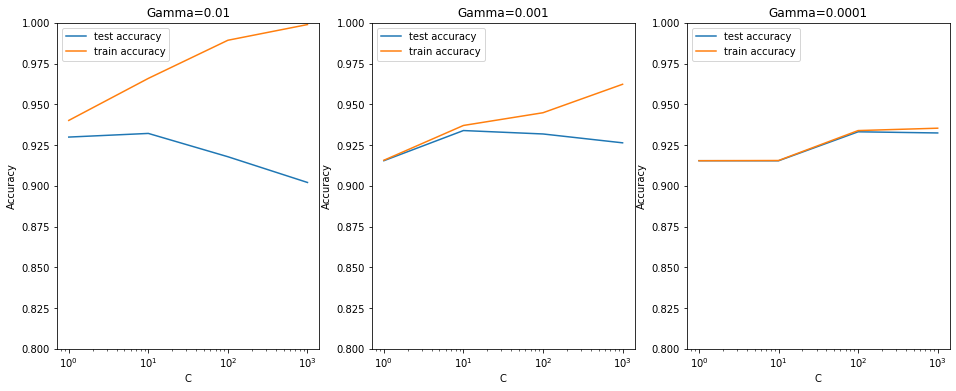

In [98]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [99]:
# specify optimal hyperparameters

#best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

#pca = PCA(n_components=65,whiten=True)
svm_pca = svm.SVC(kernel='rbf',C=10)
svm_pca.fit(X_train_PCA , y_train)

# metrics
# Print the prediction accuracy
y_test_pred = svm_pca.predict(X_test_PCA)
# Print the prediction accuracy
accuracy_svm_pca=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_svm_pca: ",accuracy_svm_pca)
sensitivity_svm_pca, specificity_svm_pca, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_svm_pca: ', round(sensitivity_svm_pca,2))
print('specificity_svm_pca: ', round(specificity_svm_pca,2))


accuracy_svm_pca:  0.928285523682455
sensitivity_svm_pca:  0.36
specificity_svm_pca:  0.98


In [100]:
#Lets build XGBOOST
from xgboost import XGBClassifier
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
# make predictions for test data
y_test_pred = model.predict(X_test)

[0]	validation_0-error:0.06471
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.06471
[2]	validation_0-error:0.063709
[3]	validation_0-error:0.063487
[4]	validation_0-error:0.063376
[5]	validation_0-error:0.063376
[6]	validation_0-error:0.064043
[7]	validation_0-error:0.063487
[8]	validation_0-error:0.063487
[9]	validation_0-error:0.063487
Stopping. Best iteration:
[4]	validation_0-error:0.063376



In [101]:
# Print the prediction accuracy
y_test_pred = model.predict(X_test)
# Print the prediction accuracy
accuracy_xgboost=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_xgboost: ",accuracy_xgboost)
sensitivity_xgboost, specificity_xgboost, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_xgboost: ', round(sensitivity_xgboost,2))
print('specificity_xgboost: ', round(specificity_xgboost,2))

# Area under curve
y_test_pred_proba = model.predict_proba(X_test)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2)) 

accuracy_xgboost:  0.9366244162775184
sensitivity_xgboost:  0.48
specificity_xgboost:  0.98
AUC:  0.9


In [102]:
#Lets build AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [103]:
# Print the prediction accuracy
y_test_pred = model.predict(X_test)
# Print the prediction accuracy
accuracy_adaboost=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy_adaboost: ",accuracy_adaboost)
sensitivity_adaboost, specificity_adaboost, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity_adaboost: ', round(sensitivity_adaboost,2))
print('specificity_adaboost: ', round(specificity_adaboost,2))

# Area under curve
y_test_pred_proba = model.predict_proba(X_test)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2)) 

accuracy_adaboost:  0.9366244162775184
sensitivity_adaboost:  0.48
specificity_adaboost:  0.98
AUC:  0.9


In [104]:
#Lets first create dataframe of accuracy,sensitivity, specificity from the all model which we have built 
# and then we will select best model among all,  best on good score of 'accuracy,sensitivity, specificity'

models_score = pd.DataFrame({
    'Model': ['LogisticRegression_PCA','Decision Tree', 'RandomForest', 'SVM_PCA', "xgboost","adaboost"
              ],
    'accuracy': [accuracy_LR,accuracy_DT,accuracy_RandomForest, accuracy_svm_pca,accuracy_xgboost,accuracy_adaboost],
    'sensitivity': [sensitivity_LR,sensitivity_DT,sensitivity_RandomForest,sensitivity_svm_pca,sensitivity_xgboost,sensitivity_adaboost],
    'specificity': [specificity_LR,specificity_DT,specificity_RandomForest,specificity_svm_pca,specificity_xgboost,specificity_adaboost]})
models_score.sort_values(by=['accuracy','specificity','sensitivity'], ascending=False)

Model  accuracy  sensitivity  specificity
4                 xgboost  0.936624     0.484663     0.981660
5                adaboost  0.936624     0.484663     0.981660
3                 SVM_PCA  0.928286     0.360736     0.984839
1           Decision Tree  0.916389     0.687117     0.939235
2            RandomForest  0.896931     0.791411     0.907446
0  LogisticRegression_PCA  0.811541     0.828221     0.809879

Text(0, 0.5, 'Algorithm')

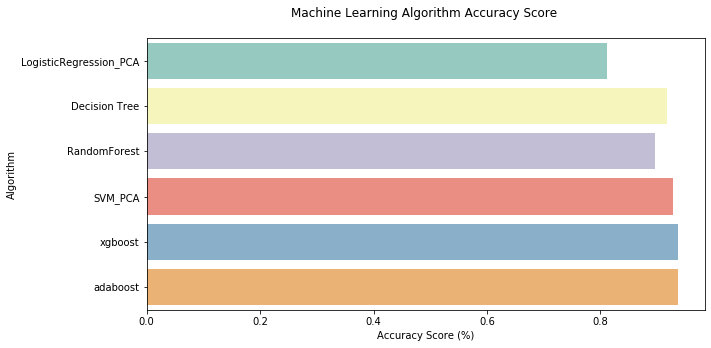

In [169]:
plt.subplots(figsize =(10, 5))

sns.barplot(x='accuracy', y = 'Model', data = models_score, palette="Set3")

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Text(0, 0.5, 'Algorithm')

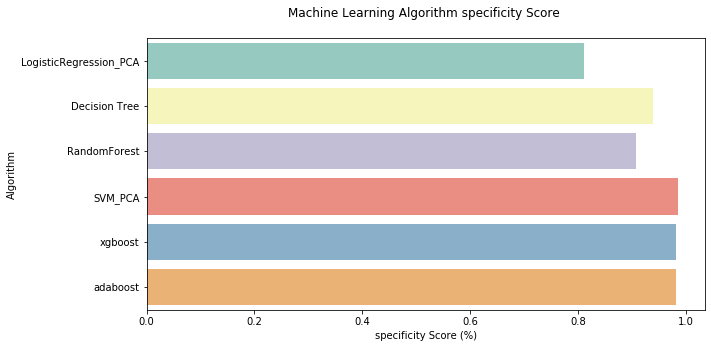

In [170]:
plt.subplots(figsize =(10, 5))

sns.barplot(x='specificity', y = 'Model', data = models_score, palette="Set3")

plt.title('Machine Learning Algorithm specificity Score \n')
plt.xlabel('specificity Score (%)')
plt.ylabel('Algorithm')

Text(0, 0.5, 'Algorithm')

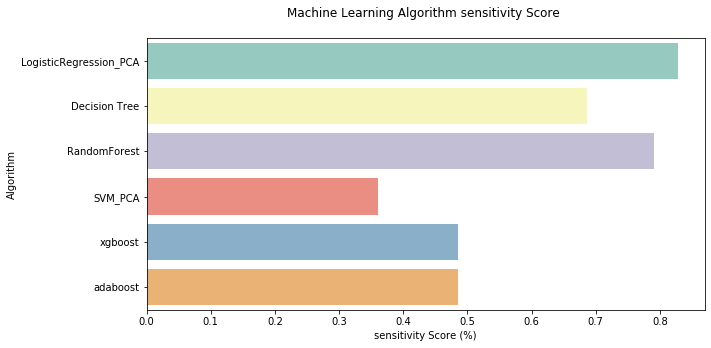

In [171]:
plt.subplots(figsize =(10, 5))

sns.barplot(x='sensitivity', y = 'Model', data = models_score, palette="Set3")

plt.title('Machine Learning Algorithm sensitivity Score \n')
plt.xlabel('sensitivity Score (%)')
plt.ylabel('Algorithm')

In [0]:
#We need to consider one model based on sensitivity and specificity score among all the model which we built



#Lets select the best predictive model among all above the model which will identified churn more accurately, 

#Conclusions of predictive model 

##After looking  into accuracy, sensitivity and specificity value of  all model,RandomForest gave good performace in terms of sensitivity and specificity and accuracy compare to other models.So better we should choose RandomForest model for prediction the customer who are likely to churn in upcoming days.

# RandomForest: accuracy :	0.896931, sensitivity: 0.791411, specificity:0.907446

#Lets Identify the main indicators of churn.

In [108]:
#Fitting the final model with the best parameters obtained from grid search.
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200,
                             criterion= 'entropy',
                           class_weight={0:0.08, 1:0.92})
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='entropy', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [109]:
# now find out the top predictor features
# predictors
all_features = X_test.columns

# importance of features calculated by random forest classifier
features_importance = rf.feature_importances_

# lets create a dataframe out of features and its importance
top_features_df = pd.DataFrame({'feature': all_features, 'importance_weight_percent': features_importance*100})
# feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort the features in their importance weightage
top_features_df = top_features_df.sort_values('importance_weight_percent', ascending=False).reset_index(drop=True)
print("Total variance explained by top features=", top_features_df.importance_weight_percent.sum())
top_features_df

Total variance explained by top features= 100.0


feature  importance_weight_percent
0        total_og_mou_8                   8.964468
1        total_ic_mou_8                   8.577314
2      total_rech_amt_8                   6.566430
3    last_day_rch_amt_8                   6.437899
4          loc_ic_mou_8                   5.046185
5        max_rech_amt_8                   4.816475
6    day_of_last_rech_8                   4.767423
7      loc_ic_t2m_mou_8                   4.675931
8         roam_ic_mou_8                   3.727699
9         roam_og_mou_8                   3.649760
10         loc_og_mou_8                   3.585850
11     loc_ic_t2t_mou_8                   3.281041
12     loc_og_t2m_mou_8                   2.708624
13     loc_og_t2t_mou_8                   2.364538
14     loc_og_t2f_mou_8                   2.210690
15     loc_ic_t2f_mou_8                   1.816582
16     std_ic_t2m_mou_8                   1.345988
17     total_rech_num_8                   1.313684
18         std_ic_mou_8                   1.235131
19         offnet_mou_8                   1.016625
20         std_og_mou_8                   0.971728
21          onnet_mou_8                   0.870661
22          vol_2g_mb_8                   0.842923
23          vol_3g_mb_8                   0.744821
24       total_ic_mou_7                   0.645170
25                  aon                   0.636175
26         spl_og_mou_8                   0.523207
27     std_og_t2t_mou_8                   0.519745
28     std_og_t2m_mou_8                   0.507370
29     total_rech_amt_7                   0.491664
30     std_ic_t2t_mou_8                   0.466143
31         std_og_mou_7                   0.438691
32       total_og_mou_7                   0.413798
33         loc_og_mou_7                   0.413089
34         loc_ic_mou_7                   0.404133
35     loc_ic_t2t_mou_7                   0.368217
36     std_ic_t2f_mou_8                   0.348680
37     loc_ic_t2m_mou_7                   0.341567
38         std_og_mou_6                   0.339949
39       total_og_mou_6                   0.319854
40          onnet_mou_7                   0.319143
41     loc_ic_t2f_mou_7                   0.318278
42     loc_og_t2m_mou_6                   0.318062
43        roam_og_mou_7                   0.311199
44          onnet_mou_6                   0.309439
45     loc_og_t2m_mou_7                   0.304063
46       total_ic_mou_6                   0.303448
47     total_rech_amt_6                   0.294017
48     std_og_t2m_mou_7                   0.290750
49     std_og_t2t_mou_6                   0.281975
50     total_rech_num_7                   0.281725
51         offnet_mou_7                   0.278812
52     loc_og_t2f_mou_7                   0.276326
53         loc_ic_mou_6                   0.271514
54     std_og_t2t_mou_7                   0.269643
55     loc_ic_t2m_mou_6                   0.259872
56        roam_ic_mou_7                   0.259870
57     loc_ic_t2f_mou_6                   0.258035
58         loc_og_mou_6                   0.253792
59     loc_og_t2f_mou_6                   0.253514
60     total_rech_num_6                   0.246606
61     loc_ic_t2t_mou_6                   0.241242
62         spl_og_mou_7                   0.234238
63           sep_vbc_3g                   0.233778
64         offnet_mou_6                   0.228655
65     loc_og_t2t_mou_7                   0.227222
66       max_rech_amt_6                   0.215251
67       max_rech_amt_7                   0.213804
68     loc_og_t2t_mou_6                   0.205093
69     std_og_t2m_mou_6                   0.199965
70   last_day_rch_amt_7                   0.197589
71         std_ic_mou_7                   0.186644
72     std_ic_t2m_mou_6                   0.182915
73         std_ic_mou_6                   0.182142
74         spl_ic_mou_8                   0.169659
75     std_ic_t2t_mou_7                   0.157389
76          vol_3g_mb_7                   0.144199
77     std_ic_t2t_mou_6               

In [132]:
#lets select top 20
top20_features = top_features_df.feature[:20]
top20_features

0         total_og_mou_8
1         total_ic_mou_8
2       total_rech_amt_8
3     last_day_rch_amt_8
4           loc_ic_mou_8
5         max_rech_amt_8
6     day_of_last_rech_8
7       loc_ic_t2m_mou_8
8          roam_ic_mou_8
9          roam_og_mou_8
10          loc_og_mou_8
11      loc_ic_t2t_mou_8
12      loc_og_t2m_mou_8
13      loc_og_t2t_mou_8
14      loc_og_t2f_mou_8
15      loc_ic_t2f_mou_8
16      std_ic_t2m_mou_8
17      total_rech_num_8
18          std_ic_mou_8
19          offnet_mou_8
Name: feature, dtype: object

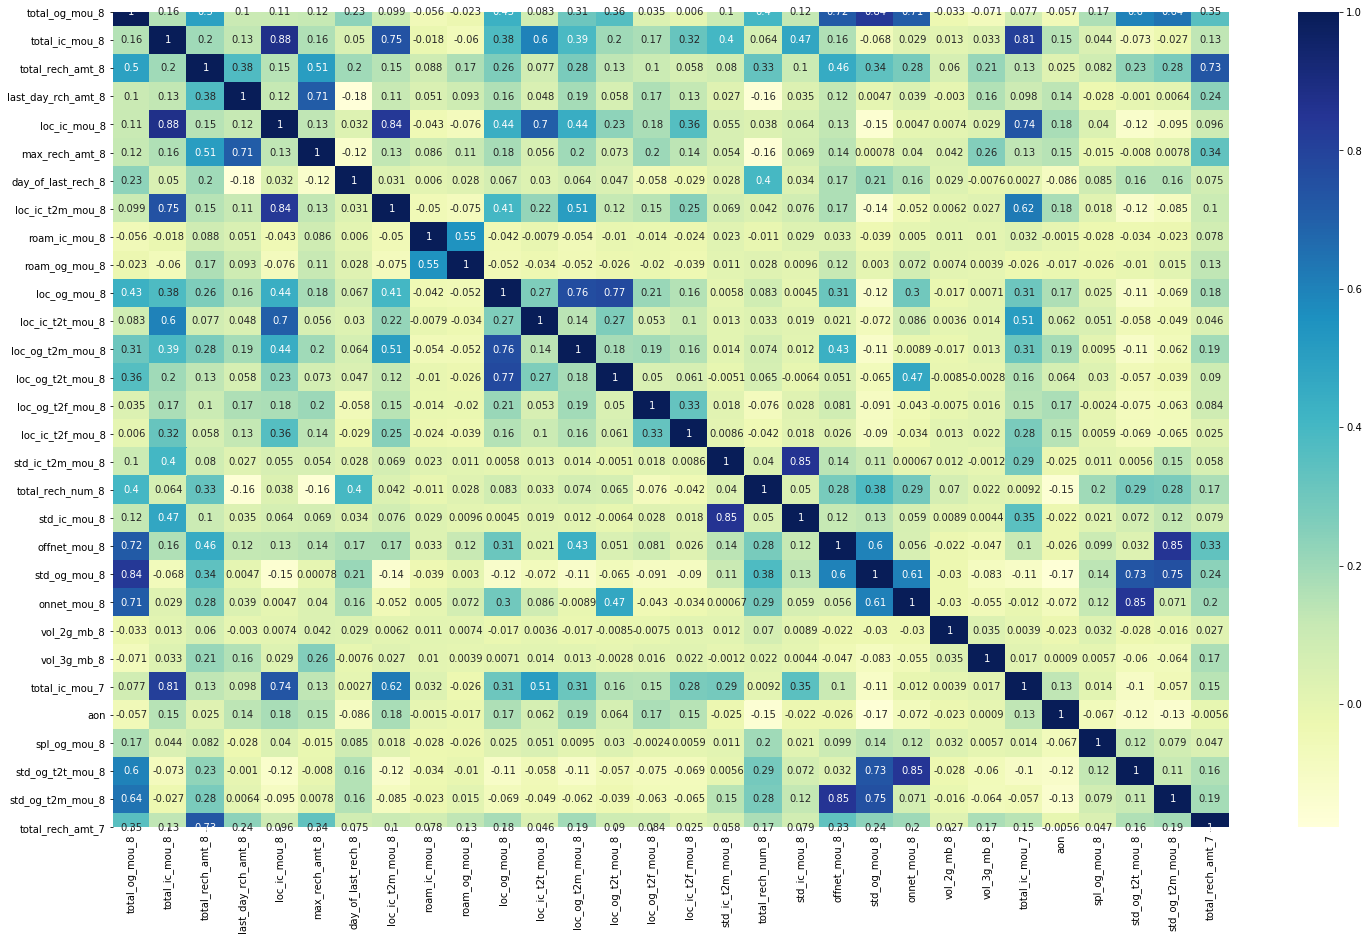

In [133]:

# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 15))
sns.heatmap(X_train[top30_features].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [135]:
#lets remove the highly correlated 
list_high_corr=['total_og_mou_8','loc_og_mou_8','loc_ic_mou_8','std_ic_t2m_mou_8','offnet_mou_8']
#lets drop these cols
X_train_final=X_train[top20_features]
X_test_final=X_test[top20_features]

print(X_train_final.shape)
print(X_test_final.shape)


(20985, 20)
(8994, 20)


In [138]:
X_train_final_data=X_train_final.drop(list_high_corr,inplace=False,axis=1)
X_test_final_data=X_test_final.drop(list_high_corr,inplace=False,axis=1)
print(X_train_final_data.shape)
print(X_test_final_data.shape)

(20985, 15)
(8994, 15)


In [139]:
steps = [
         ("logisticregression", LogisticRegression(class_weight={0:0.08, 1:0.92}))
        ]

# compile pipeline
pipe_LR = Pipeline(steps)

# hyperparameter space
hyperparams = {'logisticregression__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logisticregression__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 30)

# create gridsearch object
model_final = GridSearchCV(estimator=pipe_LR, cv=folds, param_grid=hyperparams, scoring='roc_auc', n_jobs=-1, verbose=1)

# model fit
model_final.fit(X_train_final_data, y_train)

# print best hyperparameters
print("AUC: ", model_final.best_score_)
print("hyperparameters: ", model_final.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.8826832844260281
hyperparameters:  {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}


In [0]:

# predict on test data
y_test_pred = model_final.predict(X_test_final_data)

In [141]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)
# Print the prediction accuracy
accuracy=metrics.accuracy_score(y_test, y_test_pred)
print("accuracy: ",accuracy)
# sensitivity, spcificity and AUC(Area under curve)
sensitivity, specificity, average = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print('sensitivity: ', round(sensitivity,2))
print('specificity: ', round(specificity,2))

# Area under curve
y_test_pred_proba = model_final.predict_proba(X_test_final_data)
print('AUC: ', round(roc_auc_score(y_test, y_test_pred_proba[:,1]), 2))

[[6563 1616]
 [ 137  678]]
accuracy:  0.8050922837447188
sensitivity:  0.83
specificity:  0.8
AUC:  0.88


In [142]:
X_test_final_data.shape

(8994, 15)

In [143]:
# Check for the VIF values of the independent variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_test_final_data.columns
vif['VIF'] = [variance_inflation_factor(X_test_final_data.values, i) for i in range(X_test_final_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       total_ic_mou_8  22.16
5     loc_ic_t2m_mou_8  11.16
8     loc_ic_t2t_mou_8   4.52
14        std_ic_mou_8   4.06
1     total_rech_amt_8   2.49
3       max_rech_amt_8   2.28
2   last_day_rch_amt_8   1.94
13    total_rech_num_8   1.72
7        roam_og_mou_8   1.64
6        roam_ic_mou_8   1.56
12    loc_ic_t2f_mou_8   1.56
9     loc_og_t2m_mou_8   1.51
4   day_of_last_rech_8   1.23
11    loc_og_t2f_mou_8   1.23
10    loc_og_t2t_mou_8   1.15

In [164]:
#  multicollinearity of 'total_ic_mou_8' has 22.16 which is grater than 5 so let's drop that.

X_test_final_features=X_test_final_data.drop("total_ic_mou_8",axis=1)
X_test_final_features.columns


# Check for the VIF values of the independent variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_test_final_features.columns
vif['VIF'] = [variance_inflation_factor(X_test_final_features.values, i) for i in range(X_test_final_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0     total_rech_amt_8  2.48
2       max_rech_amt_8  2.28
1   last_day_rch_amt_8  1.94
12    total_rech_num_8  1.72
6        roam_og_mou_8  1.64
5        roam_ic_mou_8  1.56
8     loc_og_t2m_mou_8  1.51
4     loc_ic_t2m_mou_8  1.38
3   day_of_last_rech_8  1.23
10    loc_og_t2f_mou_8  1.23
11    loc_ic_t2f_mou_8  1.20
7     loc_ic_t2t_mou_8  1.15
9     loc_og_t2t_mou_8  1.15
13        std_ic_mou_8  1.04

# Conclusions.........

1. Telecom company should review their STD, Roaming, local incoming, local outgoing call rates and should provide good and atractive std, roaming , incoming and outgoing call packages .
2.Telecom company should also do analysis of these cols 'total_rech_amt_8, max_rech_amt_8, last_day_rch_amt_8, total_rech_num_8' and and should take necesaary steps to retain high profitable customers.	